<a href="https://colab.research.google.com/github/emrahhorsunlu/genetik_optimizasyonu/blob/main/2012729007_Proje_Odevi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧬 Proje: Genetik Algoritma ile Numune Karışımı Optimizasyonu

---
**Öğrenci Bilgileri:**
* **Adı Soyadı:** Emrah Horsunlu
* **Öğrenci No:** 2012729007 (Son hane 7 -> Senaryo 7)
* **Ders:** Yapay Zeka Sistemleri
* **GitHub:** https://github.com/emrahhorsunlu/genetik_optimizasyonu
---

## 1. Problemin Tanımı (Senaryo 7)
Bir biyoteknoloji firması, test hassasiyetini maksimize etmek için **Reaktif A ($x_1$)** ve **Reaktif B ($x_2$)** oranlarını optimize etmek istemektedir.

### Matematiksel Model
* **Amaç Fonksiyonu (Maximize):**
    $$y = 3x_1 + 2x_2 + x_1x_2 - 0.5x_2^2$$
* **Kısıtlar:**
    1.  $x_1 + x_2 \le 100$ (Toplam karışım %100'ü geçemez)
    2.  $x_1 \ge 25$ (Reaktif A en az %25 olmalıdır)

In [11]:
# Gerekli Kütüphanelerin Yüklenmesi
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm  # İlerleme çubuğu görseli için

# Grafiklerin notebook içinde görünmesi ve stil ayarı
%matplotlib inline
plt.style.use('ggplot')

print("Kütüphaneler başarıyla yüklendi.")

Kütüphaneler başarıyla yüklendi.


In [12]:
# --- 1. PROBLEM TANIMLAMALARI ---

def amac_fonksiyonu(x1, x2):
    """
    Senaryo 7'de verilen matematiksel model.
    y = 3x1 + 2x2 + x1x2 - 0.5x2^2
    """
    return 3*x1 + 2*x2 + (x1 * x2) - 0.5 * (x2**2)

def kisit_kontrol(x1, x2):
    """
    Kısıtların kontrol edildiği fonksiyon.
    Kural 1: x1 + x2 <= 100
    Kural 2: x1 >= 25
    """
    if (x1 + x2) <= 100 and x1 >= 25:
        return True
    return False

def fitness_hesapla(birey):
    """
    Bireyin uygunluk (fitness) değerini hesaplar.
    CEZA YÖNTEMİ (PENALTY) uygulanmıştır.
    Eğer birey kısıtları ihlal ederse, skoru çok düşürülerek elenmesi sağlanır.
    """
    x1 = birey[0]
    x2 = birey[1]

    # Eğer kısıtlar sağlanmıyorsa negatif büyük bir ceza ver
    if not kisit_kontrol(x1, x2):
        return -99999

    # Kısıtlar sağlanıyorsa gerçek skoru döndür
    return amac_fonksiyonu(x1, x2)

In [13]:
# --- 2. GENETİK OPERATÖRLER ---

def birey_olustur():
    """
    Gen sınırlarına uygun rastgele birey oluşturur.
    x1 için alt sınır 25 olduğu için [25, 80] aralığını seçiyoruz.
    """
    x1 = random.uniform(25, 80)
    x2 = random.uniform(10, 80)
    return [x1, x2]

def populasyon_olustur(boyut):
    """Belirtilen boyutta popülasyon yaratır."""
    return [birey_olustur() for _ in range(boyut)]

def secim_turnuva(populasyon, k=3):
    """
    Turnuva Seçimi (Tournament Selection):
    Rastgele 'k' birey seçilir, aralarından en iyisi ebeveyn olur.
    """
    adaylar = random.sample(populasyon, k)
    adaylar.sort(key=fitness_hesapla, reverse=True) # En iyiyi başa al
    return adaylar[0]

def caprazlama(ebeveyn1, ebeveyn2):
    """
    Aritmetik Çaprazlama (Arithmetic Crossover):
    İki ebeveynin genlerinin ağırlıklı ortalaması alınır.
    """
    alpha = random.uniform(0, 1) # Karışım oranı
    yeni_x1 = alpha * ebeveyn1[0] + (1 - alpha) * ebeveyn2[0]
    yeni_x2 = alpha * ebeveyn1[1] + (1 - alpha) * ebeveyn2[1]
    return [yeni_x1, yeni_x2]

def mutasyon(birey, mutasyon_orani=0.1):
    """
    Rastgele Mutasyon:
    Gen çeşitliliğini korumak için genlere küçük rastgele değerler eklenir.
    """
    if random.random() < mutasyon_orani:
        # Genlere -2 ile +2 arasında küçük değişimler yap
        birey[0] += random.uniform(-2, 2)
        birey[1] += random.uniform(-2, 2)

        # Sınır dışına taşmayı engelle (Clamping)
        birey[0] = max(25, min(80, birey[0])) # x1 >= 25 kuralı
        birey[1] = max(10, min(80, birey[1]))

    return birey

In [14]:
# --- 3. ALGORİTMAYI ÇALIŞTIRMA ---

# Hiperparametreler
POPULASYON_BOYUTU = 100
JENERASYON_SAYISI = 80
MUTASYON_ORANI = 0.20

# Başlangıç
populasyon = populasyon_olustur(POPULASYON_BOYUTU)
gecmis_skorlar = [] # Grafik için

print(f"🧬 Optimizasyon Başlıyor... (Senaryo 7)")

# tqdm ile görsel ilerleme çubuğu
for i in tqdm(range(JENERASYON_SAYISI), desc="Evrimleşiyor"):
    yeni_populasyon = []

    # Yeni nesli doldur
    for _ in range(POPULASYON_BOYUTU):
        # 1. Seçim
        ebeveyn1 = secim_turnuva(populasyon)
        ebeveyn2 = secim_turnuva(populasyon)

        # 2. Çaprazlama
        cocuk = caprazlama(ebeveyn1, ebeveyn2)

        # 3. Mutasyon
        cocuk = mutasyon(cocuk, MUTASYON_ORANI)

        yeni_populasyon.append(cocuk)

    populasyon = yeni_populasyon

    # En iyiyi kaydet
    en_iyi = max(populasyon, key=fitness_hesapla)
    gecmis_skorlar.append(fitness_hesapla(en_iyi))

# Sonuçları al
final_birey = max(populasyon, key=fitness_hesapla)
print("\n✅ Optimizasyon Tamamlandı.")

🧬 Optimizasyon Başlıyor... (Senaryo 7)


Evrimleşiyor: 100%|██████████| 80/80 [00:00<00:00, 852.35it/s]


✅ Optimizasyon Tamamlandı.



📊 SONUÇ TABLOSU
--------------------------------
Reaktif A Oranı (x1) : %67.15
Reaktif B Oranı (x2) : %32.85
Toplam Karışım       : %99.99
TEST HASSASİYETİ     : 1933.2550
--------------------------------


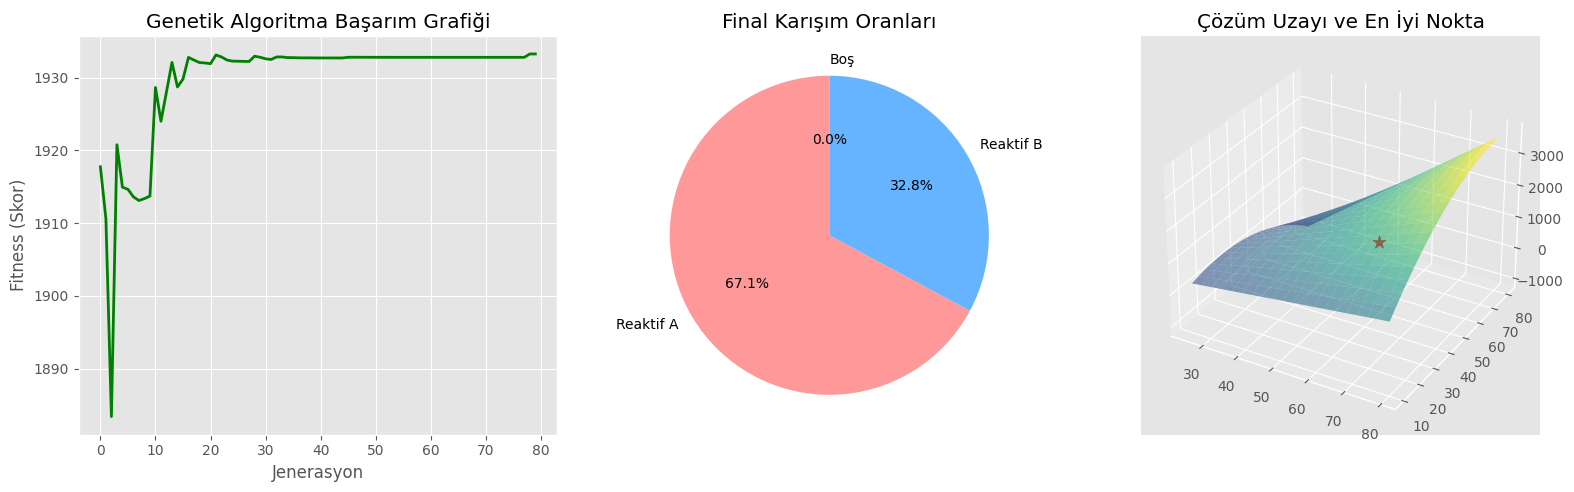

In [15]:
# --- 4. SONUÇ ANALİZİ VE GÖRSELLEŞTİRME ---

# A. Metin Raporu
skor = fitness_hesapla(final_birey)
toplam_oran = final_birey[0] + final_birey[1]

print(f"\n📊 SONUÇ TABLOSU")
print(f"--------------------------------")
print(f"Reaktif A Oranı (x1) : %{final_birey[0]:.2f}")
print(f"Reaktif B Oranı (x2) : %{final_birey[1]:.2f}")
print(f"Toplam Karışım       : %{toplam_oran:.2f}")
print(f"TEST HASSASİYETİ     : {skor:.4f}")
print(f"--------------------------------")

# B. Grafikler
fig = plt.figure(figsize=(16, 5))

# Grafik 1: Fitness Gelişimi
ax1 = fig.add_subplot(1, 3, 1)
ax1.plot(gecmis_skorlar, color='green', linewidth=2)
ax1.set_title('Genetik Algoritma Başarım Grafiği')
ax1.set_xlabel('Jenerasyon')
ax1.set_ylabel('Fitness (Skor)')

# Grafik 2: Karışım Oranları (Pasta)
ax2 = fig.add_subplot(1, 3, 2)
sizes = [final_birey[0], final_birey[1], 100 - toplam_oran]
labels = ['Reaktif A', 'Reaktif B', 'Boş']
colors = ['#ff9999','#66b3ff','#99ff99']
ax2.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax2.set_title('Final Karışım Oranları')

# Grafik 3: 3D Yüzey (Amaç Fonksiyonu)
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
x = np.linspace(25, 80, 20)
y = np.linspace(10, 80, 20)
X, Y = np.meshgrid(x, y)
Z = 3*X + 2*Y + (X * Y) - 0.5 * (Y**2)
ax3.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)
ax3.scatter(final_birey[0], final_birey[1], skor, color='red', s=100, label='En İyi', marker='*')
ax3.set_title('Çözüm Uzayı ve En İyi Nokta')

plt.tight_layout()
plt.show()